In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn tabulate


In [2]:
# ------------------------------------
# 1. Imports and Configuration
# ------------------------------------
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore # Used for Outlier Detection report

# Configuration for visualization
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 
pd.set_option('display.max_columns', None)

# Define file paths relative to the project root (where the notebook is)
INPUT_FILE = "C:\\Users\\indhu\\Downloads\\archive (1)\\Disaster2021.csv"
OUTPUT_SCALED_FILE = 'data/Disaster2021_Scaled.csv'

print("Libraries imported and configuration set.")

Libraries imported and configuration set.


In [3]:

try:
    df = pd.read_csv(INPUT_FILE)
except FileNotFoundError:
    print(f"ERROR: Data file not found at {INPUT_FILE}. Please ensure Disaster2021.csv is in the 'data' folder.")
    exit()

# Filter for Social Media Era (Year >= 2010)
df_filtered = df[df['Year'] >= 2010].copy()

print(f"Original Records: {len(df)}")
print(f"Filtered Records (Year >= 2010): {len(df_filtered)}")
print("\n--- Data Structure (.info()) ---")
df_filtered.info()

print("\n--- Sample Data (.head()) ---")
display(df_filtered.head())

Original Records: 15901
Filtered Records (Year >= 2010): 4258

--- Data Structure (.info()) ---
<class 'pandas.core.frame.DataFrame'>
Index: 4258 entries, 11287 to 15900
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_No                4258 non-null   object 
 1   Year                 4258 non-null   int64  
 2   Seq                  4258 non-null   int64  
 3   Disaster_Group       4258 non-null   object 
 4   Disaster_Subgroup    4258 non-null   object 
 5   Disaster_Type        4258 non-null   object 
 6   Disaster_Subtype     3546 non-null   object 
 7   Disaster_Subsubtype  423 non-null    object 
 8   Event_Name           1023 non-null   object 
 9   Entry_Criteria       4256 non-null   object 
 10  Country              4258 non-null   object 
 11  ISO                  4258 non-null   object 
 12  Region               4258 non-null   object 
 13  Continent            4258 non-null   objec

,ID_No,Year,Seq,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Event_Name,Entry_Criteria,Country,ISO,Region,Continent,Location,Origin,Associated_Dis,Associated_Dis2,OFDA_Response,Appeal,Declaration,Aid_Contribution,Dis_Mag_Value,Dis_Mag_Scale,Latitude,Longitude,Local_Time,River_Basin,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,Recon_Costs,Insured_Damages,Total_Damages,CPI
11287,2010-0179-CHN,2010,179,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Kill,China,CHN,Eastern Asia,Asia,Chongqing Shi province,NaN,Hail,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,2010,5.0,6.0,2010,5.0,6.0,29.0,190.0,NaN,70000.0,70190.0,NaN,NaN,62251.0,85.292061
11288,2010-0484-CHN,2010,484,Natural,Meteorological,Storm,Tropical cyclone,NaN,Typhoon Fanapi,Regional,China,CHN,Eastern Asia,Asia,"Fujian Sheng, Guangdong Sheng provinces",NaN,Flood,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,2010,9.0,20.0,2010,9.0,20.0,75.0,NaN,1000000.0,NaN,1000000.0,NaN,NaN,298285.0,85.292061
11289,2010-0036-CHN,2010,36,Natural,Meteorological,Storm,Convective storm,Winter storm/Blizzard,NaN,Kill,China,CHN,Eastern Asia,Asia,Xinjiang Uygur Zizhiqu province,NaN,"Avalanche (Snow, Debris)",Cold wave,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,2010,1.0,1.0,2010,1.0,27.0,30.0,1100.0,1880000.0,NaN,1881100.0,NaN,NaN,90000.0,85.292061
11290,2010-0102-AUS,2010,102,Natural,Meteorological,Storm,Convective storm,Lightning/Thunderstorms,NaN,Declar,Australia,AUS,Australia and New Zealand,Oceania,"Victoria, New South Wales, Tasmania provinces",NaN,Hail,Flood,NaN,NaN,NaN,NaN,100.0,Kph,NaN,NaN,NaN,NaN,2010,3.0,6.0,2010,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,950000.0,1330000.0,85.292061
11291,2010-0669-AFG,2010,669,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,Afghanistan,AFG,Southern Asia,Asia,Samangan province,NaN,"Slide (land, mud, snow, rock)",NaN,NaN,NaN,NaN,NaN,6.0,Richter,35.633,67.658,NaN,NaN,2010,4.0,18.0,2010,4.0,18.0,11.0,70.0,NaN,1000.0,1070.0,NaN,NaN,NaN,85.292061


In [4]:


df_cleaned = df_filtered.copy()

high_missing_cols = [
    'Recon_Costs', 'Aid_Contribution', 'OFDA_Response', 'Appeal', 'Local_Time',
    'Associated_Dis2', 'Insured_Damages', 'River_Basin', 'Disaster_Subsubtype',
    'No_Homeless', 'Declaration', 'Event_Name', 'Associated_Dis', 'Total_Damages',
    'Origin', 'End_Year', 'End_Month', 'End_Day', 'Seq', 'Year'
]
df_cleaned.drop(columns=high_missing_cols, inplace=True, errors='ignore')

df_cleaned['Start_Month'] = df_cleaned['Start_Month'].fillna(1).astype(int)
df_cleaned['Start_Day'] = df_cleaned['Start_Day'].fillna(1).astype(int)

def create_date(row):
    try:
        return date(int(row['Start_Year']), row['Start_Month'], row['Start_Day'])
    except ValueError:
        return date(int(row['Start_Year']), row['Start_Month'], 1)
        
df_cleaned['Start_Date'] = pd.to_datetime(df_cleaned.apply(create_date, axis=1))
df_cleaned.drop(columns=['Start_Year', 'Start_Month', 'Start_Day'], inplace=True)

# C. Target Variable Creation (Severity_Level)
impact_cols = ['Total_Deaths', 'No_Injured', 'No_Affected', 'Total_Affected']
for col in impact_cols:
    df_cleaned[col] = df_cleaned[col].fillna(0) # Impute 0 for impact
    
df_cleaned['Severity_Level'] = np.where(
    (df_cleaned['Total_Affected'] > 1000) | (df_cleaned['Total_Deaths'] > 10),
    1, 0
)

# D. Spatial/Numerical Imputation (Median)
df_cleaned['Latitude'] = pd.to_numeric(df_cleaned['Latitude'], errors='coerce')
df_cleaned['Longitude'] = pd.to_numeric(df_cleaned['Longitude'], errors='coerce')

numerical_to_impute = ['Latitude', 'Longitude', 'CPI', 'Dis_Mag_Value']
for col in numerical_to_impute:
    median_val = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_val) 

print("Data Cleaning and Feature Engineering complete.")
print("\n--- Missing Value Report after Cleaning ---")
display(df_cleaned.isnull().sum().sort_values(ascending=False).head())

Data Cleaning and Feature Engineering complete.

--- Missing Value Report after Cleaning ---


Disaster_Subtype    712
Dis_Mag_Scale       273
Location            175
Entry_Criteria        2
Disaster_Group        0
dtype: int64

In [5]:


# Get the list of columns that still have missing values
missing_cols = df_cleaned.isnull().sum().sort_values(ascending=False)
cols_to_impute = missing_cols[missing_cols > 0].index.tolist()

print(f"Columns remaining to impute: {cols_to_impute}")

# Impute remaining missing values using the mode for each column
for col in cols_to_impute:
    # Calculate the mode (most frequent value)
    mode_val = df_cleaned[col].mode()[0]
    # Fill NA values with the mode
    df_cleaned[col] = df_cleaned[col].fillna(mode_val)

print("\nImputation of remaining missing values complete.")

print("\n--- Final Missing Value Report ---")
final_missing_report = df_cleaned.isnull().sum().sort_values(ascending=False)
display(final_missing_report.head())

Columns remaining to impute: ['Disaster_Subtype', 'Dis_Mag_Scale', 'Location', 'Entry_Criteria']

Imputation of remaining missing values complete.

--- Final Missing Value Report ---


ID_No                0
Disaster_Group       0
Disaster_Subgroup    0
Disaster_Type        0
Disaster_Subtype     0
dtype: int64

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Select numerical columns
numerical_stats_cols = ['Total_Deaths', 'Total_Affected', 'Dis_Mag_Value', 'CPI']

print("--- Descriptive Statistics ---")
display(df_cleaned[numerical_stats_cols].describe().T)

print("\n--- Outlier Detection Report (Total_Affected) ---")
z_scores = zscore(df_cleaned['Total_Affected'])
outlier_count_zscore = len(df_cleaned[np.abs(z_scores) > 3])
print(f"Records with Total_Affected Z-score > 3: {outlier_count_zscore}")
print(f"Percentage of extreme outliers: {(outlier_count_zscore / len(df_cleaned) * 100):.2f}%")

print("\n--- Skewness and Kurtosis (Distribution Shape) ---")
display(df_cleaned[numerical_stats_cols].agg(['skew', 'kurt']).T)






--- Descriptive Statistics ---


,count,mean,std,min,25%,50%,75%,max
Total_Deaths,500.0,25.278000,149.468104,0.000000,3.000000,5.000000,6.000000,1.430000e+03
Total_Affected,500.0,76272.320000,506258.430235,9726.000000,9943.500000,10011.500000,10079.000000,5.000000e+06
Dis_Mag_Value,500.0,6.972949,1.142328,5.003520,6.031740,6.978101,7.900823,8.998290e+00
CPI,500.0,100.134667,5.762925,90.021347,95.045032,100.558382,105.113301,1.099684e+02



--- Outlier Detection Report (Total_Affected) ---
Records with Total_Affected Z-score > 3: 5
Percentage of extreme outliers: 1.00%

--- Skewness and Kurtosis (Distribution Shape) ---


,skew,kurt
Total_Deaths,7.678907,60.144443
Total_Affected,9.302902,87.792042
Dis_Mag_Value,0.010373,-1.155067
CPI,-0.031009,-1.258612


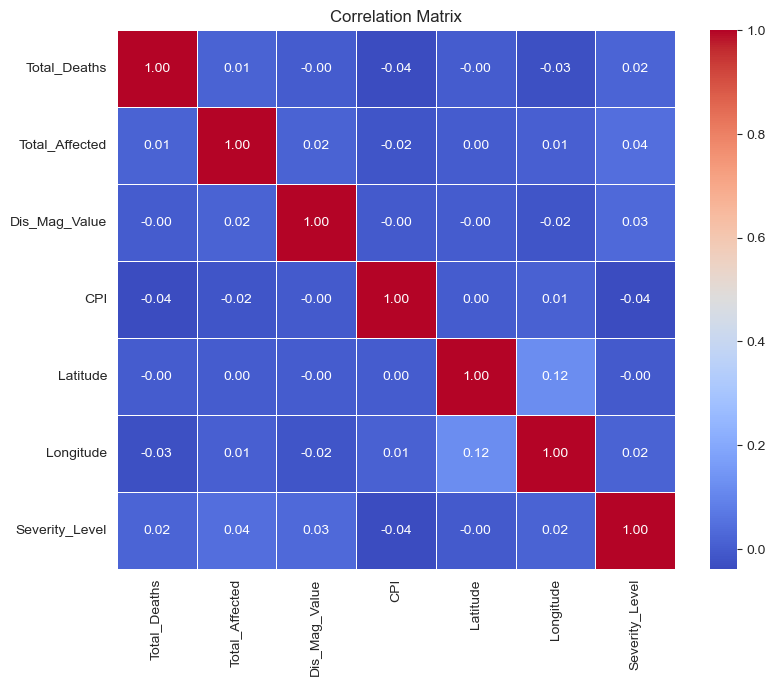

In [6]:
# ------------------------------------
# 5. Correlation Analysis
# ------------------------------------
correlation_cols = numerical_stats_cols + ['Latitude', 'Longitude', 'Severity_Level']
correlation_matrix = df_cleaned[correlation_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar=True)
plt.title('Correlation Matrix')
plt.show()


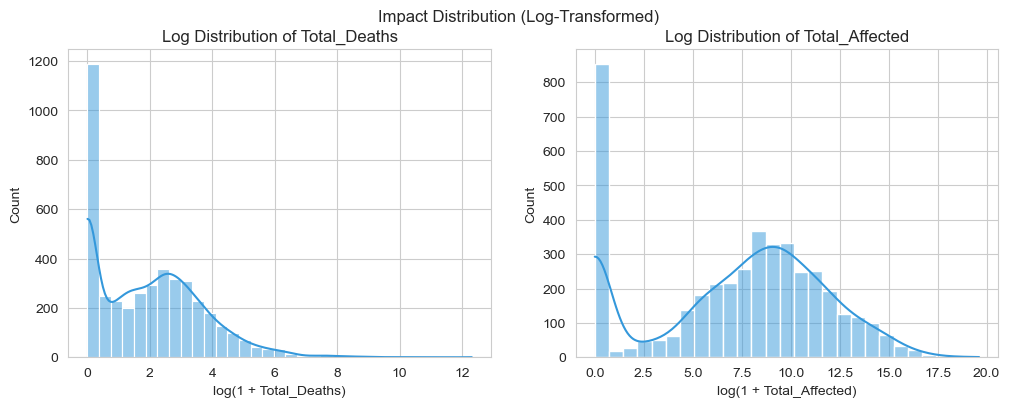

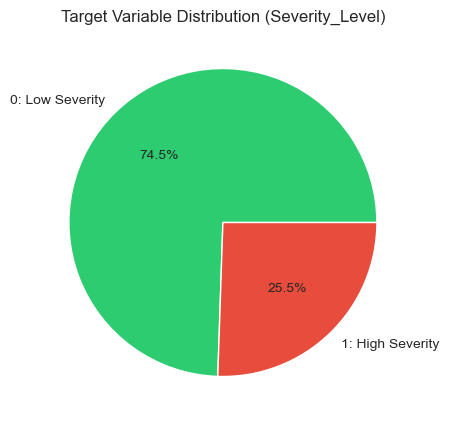

C:\Users\indhu\AppData\Local\Temp\ipykernel_9060\3615681476.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_rate.index, y=severity_rate.values, palette='viridis')


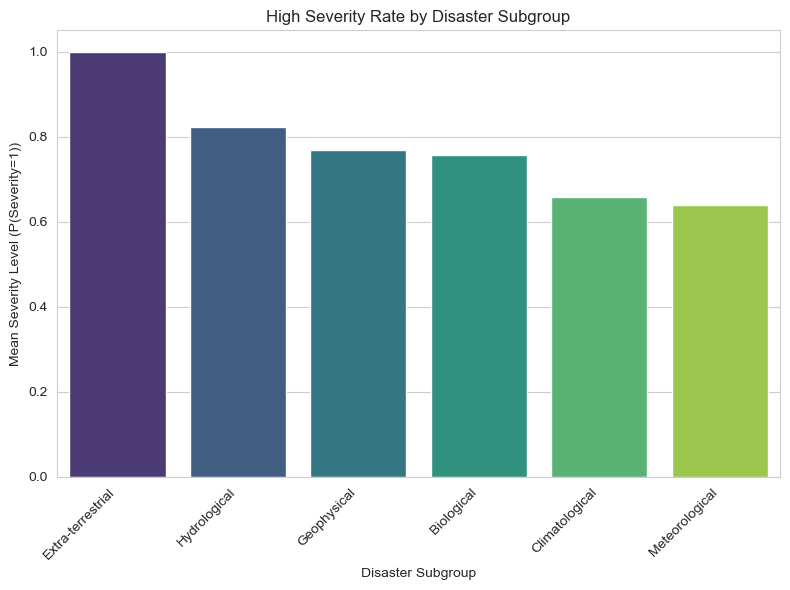

In [7]:
# ------------------------------------
# 6. Data Visualization
# ------------------------------------

# --- A. Impact Distribution (Log-Transformed) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
numerical_cols_raw = ['Total_Deaths', 'Total_Affected']

for i, col in enumerate(numerical_cols_raw):
    # Use log(1 + x) for heavily skewed data
    sns.histplot(np.log1p(df_cleaned[col]), kde=True, ax=axes[i], color='#3498db')
    axes[i].set_title(f'Log Distribution of {col}')
    axes[i].set_xlabel(f'log(1 + {col})')

plt.suptitle("Impact Distribution (Log-Transformed)")
plt.show()

# --- B. Target Distribution ---
plt.figure(figsize=(5, 5))
df_cleaned['Severity_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                                 colors=['#2ecc71', '#e74c3c'], 
                                                 labels=['0: Low Severity', '1: High Severity'])
plt.ylabel('')
plt.title('Target Variable Distribution (Severity_Level)')
plt.show()

# --- C. Severity Rate by Disaster Subgroup ---
plt.figure(figsize=(8, 6))
severity_rate = df_cleaned.groupby('Disaster_Subgroup')['Severity_Level'].mean().sort_values(ascending=False)
sns.barplot(x=severity_rate.index, y=severity_rate.values, palette='viridis')
plt.title('High Severity Rate by Disaster Subgroup')
plt.ylabel('Mean Severity Level (P(Severity=1))')
plt.xlabel('Disaster Subgroup')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
# ------------------------------------
# 7. Feature Scaling and Final Save
# ------------------------------------

df_final = df_cleaned.copy()

# Apply Z-score standardization to numerical columns
scaling_cols = ['Total_Deaths', 'No_Injured', 'No_Affected', 'Total_Affected', 'Dis_Mag_Value', 'CPI', 'Latitude', 'Longitude']
scaler = StandardScaler()

df_final[scaling_cols] = scaler.fit_transform(df_final[scaling_cols])

print("Feature Scaling (Standardization) applied to numerical metrics.")
print("\n--- Final Scaled Data Sample ---")
display(df_final[scaling_cols].head())

# Select final features
final_cols = [
    'ID_No', 'Start_Date', 'Country', 'ISO', 'Disaster_Subgroup', 'Disaster_Type',
    'Disaster_Subtype', 'Location', 'Latitude', 'Longitude', 
    'Dis_Mag_Value', 'CPI', 'Total_Deaths', 'Total_Affected', 'Severity_Level'
]
df_final = df_final[final_cols]

# Save the final scaled data
df_final.to_csv(OUTPUT_SCALED_FILE, index=False)
print(f"\nSUCCESS: Cleaned and Scaled Data saved to: {OUTPUT_SCALED_FILE}")

Feature Scaling (Standardization) applied to numerical metrics.

--- Final Scaled Data Sample ---


,Total_Deaths,No_Injured,No_Affected,Total_Affected,Dis_Mag_Value,CPI,Latitude,Longitude
11287,-0.026180,-0.051572,-0.072849,-0.061710,-0.087112,-1.778238,-0.008667,0.047458
11288,-0.013236,-0.068698,0.094465,0.093851,-0.087112,-1.778238,-0.008667,0.047458
11289,-0.025898,0.030457,0.241701,0.241263,-0.087112,-1.778238,-0.008667,0.047458
11290,-0.034340,-0.068698,-0.072849,-0.073453,-0.087445,-1.778238,-0.008667,0.047458
11291,-0.031245,-0.062388,-0.072849,-0.073274,-0.087814,-1.778238,0.301364,0.137526



SUCCESS: Cleaned and Scaled Data saved to: data/Disaster2021_Scaled.csv


In [9]:
!pip install geopy


   ---------------------------------------- 0/2 [geographiclib]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   -------------------- ------------------- 1/2 [geopy]
   ---------------------------------------- 2/2 [geopy]



Dataset shape: (15901, 43)

Columns (first 40):
 ['ID_No', 'Year', 'Seq', 'Disaster_Group', 'Disaster_Subgroup', 'Disaster_Type', 'Disaster_Subtype', 'Disaster_Subsubtype', 'Event_Name', 'Entry_Criteria', 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated_Dis', 'Associated_Dis2', 'OFDA_Response', 'Appeal', 'Declaration', 'Aid_Contribution', 'Dis_Mag_Value', 'Dis_Mag_Scale', 'Latitude', 'Longitude', 'Local_Time', 'River_Basin', 'Start_Year', 'Start_Month', 'Start_Day', 'End_Year', 'End_Month', 'End_Day', 'Total_Deaths', 'No_Injured', 'No_Affected', 'No_Homeless', 'Total_Affected', 'Recon_Costs']

First 5 rows:


,ID_No,Year,Seq,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Event_Name,Entry_Criteria,...,End_Day,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,Recon_Costs,Insured_Damages,Total_Damages,CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1902-0012-GTM,1902,12,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,...,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,3.391845
3,1902-0003-GTM,1902,3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
4,1902-0010-GTM,1902,10,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845



Top 30 columns by missing count:
Recon_Costs            15870
Aid_Contribution       15224
Associated_Dis2        15217
Disaster_Subsubtype    14848
Insured_Damages        14807
Local_Time             14804
River_Basin            14639
OFDA_Response          14294
No_Homeless            13487
Appeal                 13332
Latitude               13179
Longitude              13176
Declaration            12672
Associated_Dis         12659
Origin                 12217
Event_Name             12089
No_Injured             12069
Dis_Mag_Value          10989
Total_Damages          10723
No_Affected             6857
Total_Deaths            4620
Total_Affected          4480
Start_Day               3603
End_Day                 3534
Disaster_Subtype        3016
Location                1804
Dis_Mag_Scale           1175
End_Month                708
CPI                      497
Start_Month              385
dtype: int64

Target value counts (top 20):
Disaster_Type
Flood                    5447
Storm   

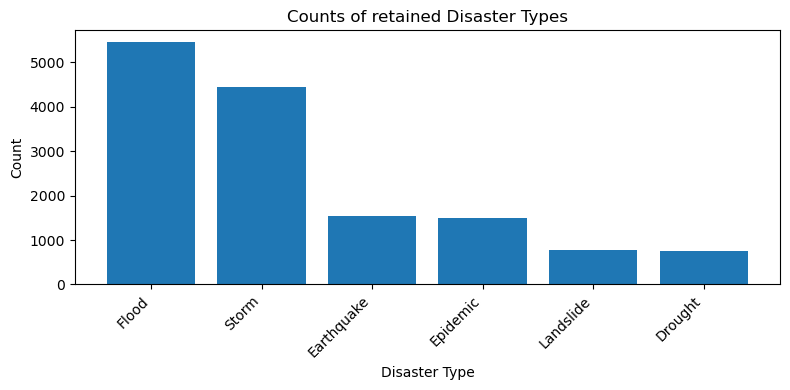

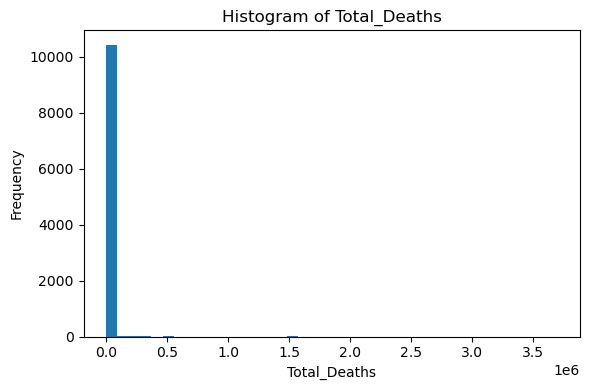

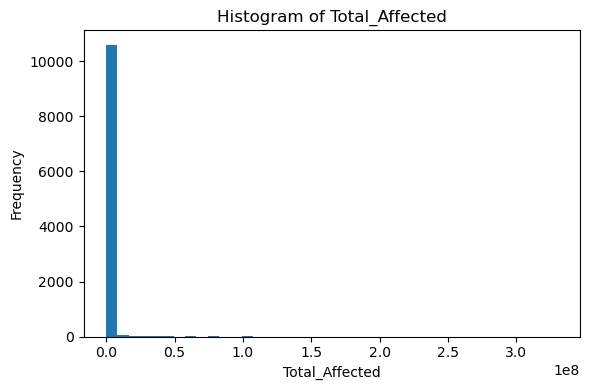

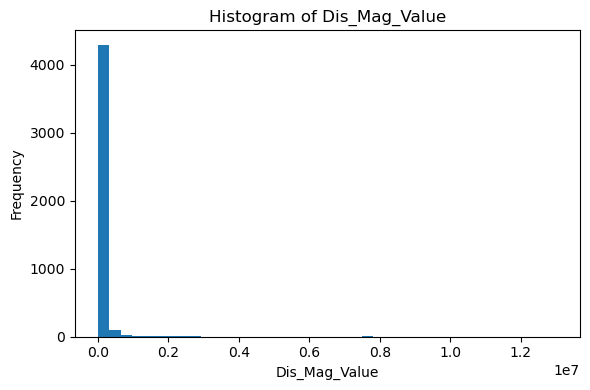

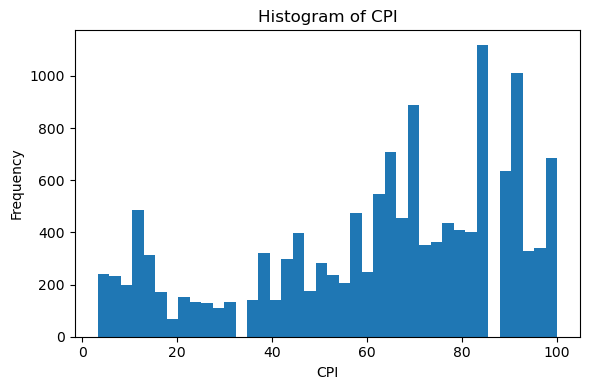

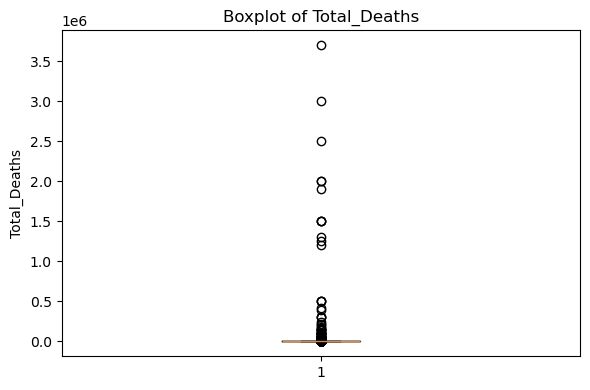

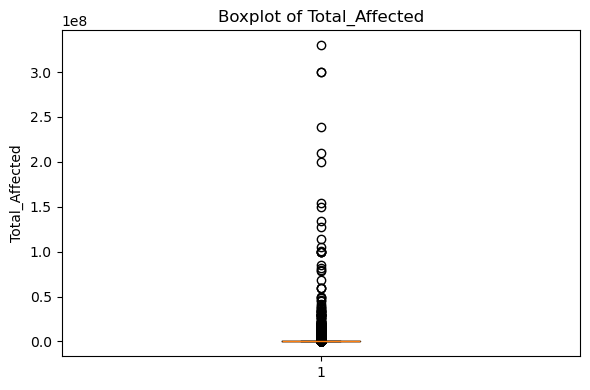

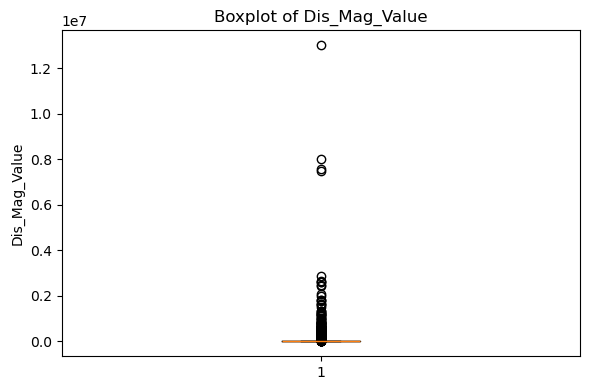

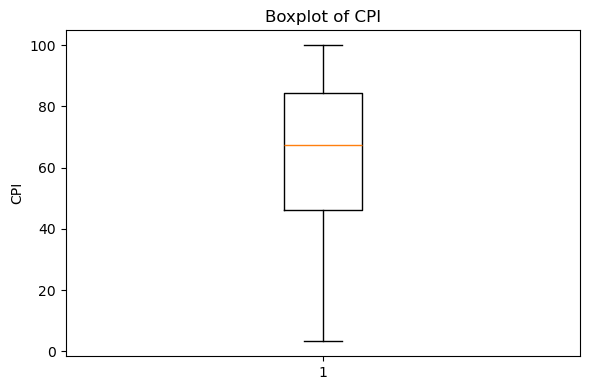

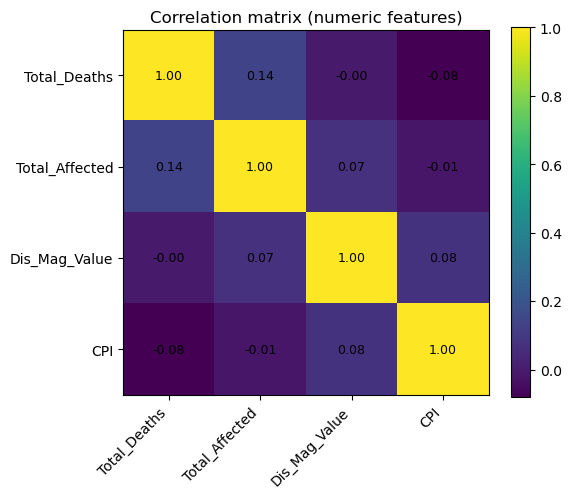

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [7]:
# Full pipeline: EDA -> Preprocessing -> Modeling -> Interactive prediction helper
# Run in a Jupyter notebook or an interactive Python environment.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------------
# 0) Settings
# ----------------------------
file_path = "C:\\Users\\indhu\\Downloads\\archive (1)\\Disaster2021.csv"  # change if needed
TARGET = 'Disaster_Type'
TOP_N = 6   # keep top-N classes (adjustable)

# ----------------------------
# 1) Load data & quick EDA
# ----------------------------
df = pd.read_csv(file_path)
print("Dataset shape:", df.shape)
print("\nColumns (first 40):\n", df.columns[:40].tolist())
print("\nFirst 5 rows:")
display(df.head())

# missing value summary (top 30)
missing_counts = df.isnull().sum().sort_values(ascending=False)
print("\nTop 30 columns by missing count:")
print(missing_counts.head(30))

# target distribution
print("\nTarget value counts (top 20):")
print(df[TARGET].value_counts().head(20))

# ----------------------------
# 2) Choose features & filter classes
# ----------------------------
numeric_features = ['Total_Deaths', 'Total_Affected', 'Dis_Mag_Value', 'CPI']
categorical_features = ['Country', 'Region']
features = numeric_features + categorical_features

# drop rows where target is missing
df = df.dropna(subset=[TARGET])
print("\nAfter dropping missing target, dataset shape:", df.shape)

# keep only top-N most frequent disaster types (avoid extremely rare classes)
top_n_list = df[TARGET].value_counts().nlargest(TOP_N).index.tolist()
print(f"\nTop {TOP_N} disaster types retained:", top_n_list)
df_model = df[df[TARGET].isin(top_n_list)].copy()
print("Shape after filtering to top types:", df_model.shape)
print("\nClass counts (used for modeling):")
print(df_model[TARGET].value_counts())

# ----------------------------
# 3) Exploratory visualizations (matplotlib only)
# ----------------------------
# (a) Bar chart of retained class counts
class_counts = df_model[TARGET].value_counts()
plt.figure(figsize=(8,4))
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title("Counts of retained Disaster Types")
plt.xlabel("Disaster Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# (b) Histograms for numeric features (separate figures)
for col in numeric_features:
    vals = df_model[col].dropna()
    plt.figure(figsize=(6,4))
    if len(vals) == 0:
        print(f"No values to plot for {col}")
    else:
        plt.hist(vals, bins=40)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# (c) Boxplots for numeric features (separate figures)
for col in numeric_features:
    vals = df_model[col].dropna()
    plt.figure(figsize=(6,4))
    if len(vals) == 0:
        print(f"No values to plot for {col}")
    else:
        plt.boxplot(vals, vert=True)
        plt.title(f"Boxplot of {col}")
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# (d) Numeric correlation matrix (heatmap via imshow)
corr = df_model[numeric_features].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.colorbar()
plt.xticks(ticks=np.arange(len(numeric_features)), labels=numeric_features, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(numeric_features)), labels=numeric_features)
plt.title("Correlation matrix (numeric features)")
# annotate
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', fontsize=9)
plt.tight_layout()
plt.show()

# ----------------------------
# 4) Preprocessing pipeline
# ----------------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ----------------------------
# 5) Encode target & split
# ----------------------------
le_target = LabelEncoder()
y = le_target.fit_transform(df_model[TARGET].astype(str))
X = df_model[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

# ----------------------------
# 6) Train & evaluate models
# ----------------------------
models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "LogisticRegression": LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced', multi_class='multinomial', solver='lbfgs')
}

trained_pipelines = {}
scores = []

for name, clf in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', clf)])
    print(f"\nTraining {name} ...")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {name}: {acc:.4f}")
    crep = classification_report(y_test, y_pred, target_names=le_target.classes_)
    print(f"\nClassification report for {name}:\n", crep)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", cm)
    # plot confusion matrix
    plt.figure(figsize=(6,5))
    plt.imshow(cm)
    plt.colorbar()
    plt.xticks(ticks=np.arange(len(le_target.classes_)), labels=le_target.classes_, rotation=45, ha='right')
    plt.yticks(ticks=np.arange(len(le_target.classes_)), labels=le_target.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    trained_pipelines[name] = pipe
    scores.append({'model': name, 'accuracy': acc})

scores_df = pd.DataFrame(scores).sort_values('accuracy', ascending=False).reset_index(drop=True)
print("\nModel comparison (accuracy):")
print(scores_df)

# choose best model
best_model_name = scores_df.loc[0, 'model']
best_pipeline = trained_pipelines[best_model_name]
print("\nBest model selected:", best_model_name)

# ----------------------------
# 7) RandomForest: feature importances (if available)
# ----------------------------
if 'RandomForest' in trained_pipelines:
    rf_pipe = trained_pipelines['RandomForest']
    # Build feature names after one-hot
    num_names = numeric_features
    try:
        cat_encoder = rf_pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
        cat_names = list(cat_encoder.get_feature_names_out(categorical_features))
    except Exception:
        cat_names = []
    feature_names = num_names + cat_names
    importances = rf_pipe.named_steps['clf'].feature_importances_
    feat_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False).reset_index(drop=True)
    print("\nTop feature importances (RandomForest):")
    print(feat_df.head(20))
    # plot top 12 importances
    topn = min(12, len(feat_df))
    plt.figure(figsize=(8,6))
    plt.barh(feat_df['feature'].head(topn)[::-1], feat_df['importance'].head(topn)[::-1])
    plt.title("Top feature importances (RandomForest)")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

# ----------------------------
# 8) Sample predictions from test set (show actual vs predicted)
# ----------------------------
X_test_copy = X_test.copy().reset_index(drop=True)
y_test_labels = le_target.inverse_transform(y_test)
X_test_copy['actual_disaster_type'] = y_test_labels

sample = X_test_copy.sample(10, random_state=1).reset_index(drop=True)
sample_features = sample[features]
sample_preds_enc = best_pipeline.predict(sample_features)
sample_preds = le_target.inverse_transform(sample_preds_enc)
sample['predicted_disaster_type'] = sample_preds
print("\nSample predictions (features + actual vs predicted):")
display(sample)

# ----------------------------
# 9) Interactive helper to predict from user input
# ----------------------------
def predict_from_user_input(pipeline, label_encoder):
    """
    Interactive helper: prompts user for feature values and prints predicted disaster type.
    Example: predict_from_user_input(best_pipeline, le_target)
    """
    print("Enter values for each feature (press Enter to leave numeric blank => treated as missing):")
    def safe_float(s):
        s = s.strip()
        if s == "":
            return np.nan
        try:
            return float(s)
        except:
            return np.nan

    total_deaths = safe_float(input("Total_Deaths (e.g., 1200): "))
    total_affected = safe_float(input("Total_Affected (e.g., 200000): "))
    dis_mag_value = safe_float(input("Dis_Mag_Value (e.g., 6.2): "))
    cpi = safe_float(input("CPI (e.g., 95.2): "))
    country = input("Country (e.g., India) [leave blank => 'Unknown']: ").strip() or "Unknown"
    region = input("Region/Continent (e.g., Asia) [leave blank => 'Unknown']: ").strip() or "Unknown"

    row = pd.DataFrame([{
        'Total_Deaths': total_deaths,
        'Total_Affected': total_affected,
        'Dis_Mag_Value': dis_mag_value,
        'CPI': cpi,
        'Country': country,
        'Region': region
    }])

    pred_enc = pipeline.predict(row)
    pred_label = label_encoder.inverse_transform(pred_enc)[0]
    print("\nPredicted Disaster Type:", pred_label)
    return pred_label

print("\nPipeline is ready. To make an interactive prediction, call:")
print(">>> predict_from_user_input(best_pipeline, le_target)")


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
file_path = "C:\\Users\\indhu\\Downloads\\archive (1)\\Disaster2021.csv"
df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample Data:")
display(df.head())

Dataset shape: (15901, 43)

Columns: ['ID_No', 'Year', 'Seq', 'Disaster_Group', 'Disaster_Subgroup', 'Disaster_Type', 'Disaster_Subtype', 'Disaster_Subsubtype', 'Event_Name', 'Entry_Criteria', 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated_Dis', 'Associated_Dis2', 'OFDA_Response', 'Appeal', 'Declaration', 'Aid_Contribution', 'Dis_Mag_Value', 'Dis_Mag_Scale', 'Latitude', 'Longitude', 'Local_Time', 'River_Basin', 'Start_Year', 'Start_Month', 'Start_Day', 'End_Year', 'End_Month', 'End_Day', 'Total_Deaths', 'No_Injured', 'No_Affected', 'No_Homeless', 'Total_Affected', 'Recon_Costs', 'Insured_Damages', 'Total_Damages', 'CPI']

Sample Data:


,ID_No,Year,Seq,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Event_Name,Entry_Criteria,...,End_Day,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,Recon_Costs,Insured_Damages,Total_Damages,CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1902-0012-GTM,1902,12,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,...,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,3.391845
3,1902-0003-GTM,1902,3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
4,1902-0010-GTM,1902,10,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845


In [10]:
print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Data Types ---")
print(df.dtypes)

# Select relevant columns
numeric_features = ['Total_Deaths', 'Total_Affected', 'Dis_Mag_Value', 'CPI']
categorical_features = ['Country', 'Region']
target = 'Disaster_Type'
# Drop rows without target
df = df.dropna(subset=[target])
print("\nAfter dropping rows with missing target:", df.shape)

# Keep top 6 frequent disaster types
top_n = 6
top_classes = df[target].value_counts().nlargest(top_n).index.tolist()
df = df[df[target].isin(top_classes)]
print("\nRetained Disaster Types:", top_classes)



--- Missing Values ---
ID_No                      0
Year                       0
Seq                        0
Disaster_Group             0
Disaster_Subgroup          0
Disaster_Type              0
Disaster_Subtype        3016
Disaster_Subsubtype    14848
Event_Name             12089
Entry_Criteria           335
Country                    0
ISO                        0
Region                     0
Continent                  0
Location                1804
Origin                 12217
Associated_Dis         12659
Associated_Dis2        15217
OFDA_Response          14294
Appeal                 13332
Declaration            12672
Aid_Contribution       15224
Dis_Mag_Value          10989
Dis_Mag_Scale           1175
Latitude               13179
Longitude              13176
Local_Time             14804
River_Basin            14639
Start_Year                 0
Start_Month              385
Start_Day               3603
End_Year                   0
End_Month                708
End_Day            

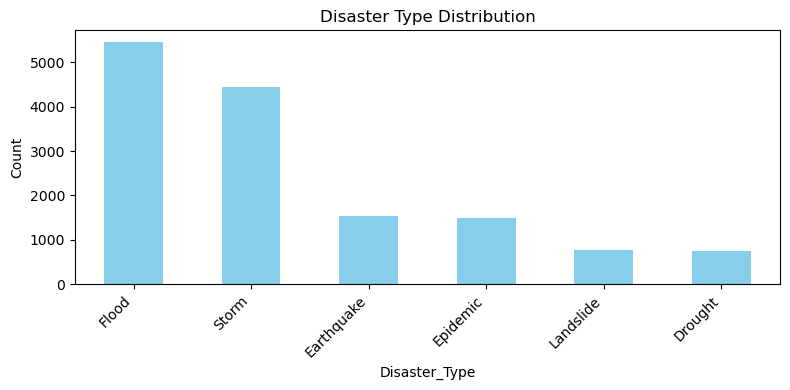

In [11]:
# (a) Disaster Type Counts
plt.figure(figsize=(8,4))
df[target].value_counts().plot(kind='bar', color='skyblue')
plt.title("Disaster Type Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

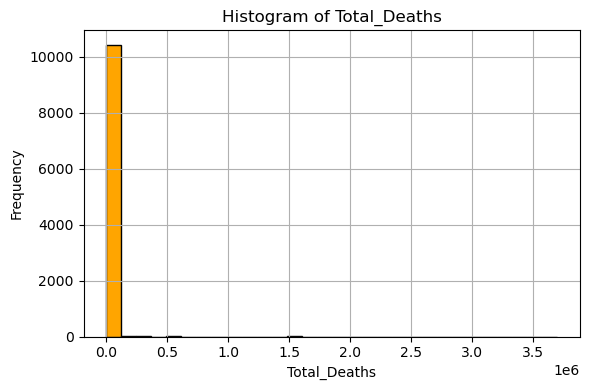

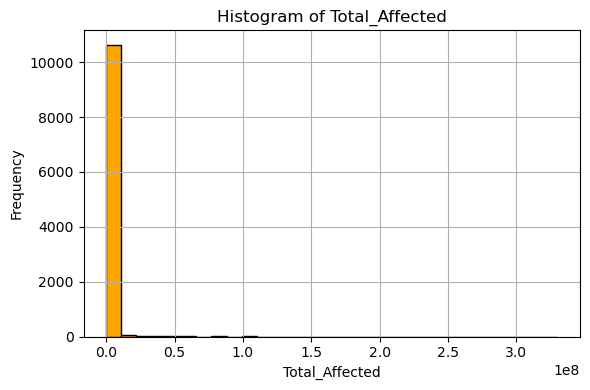

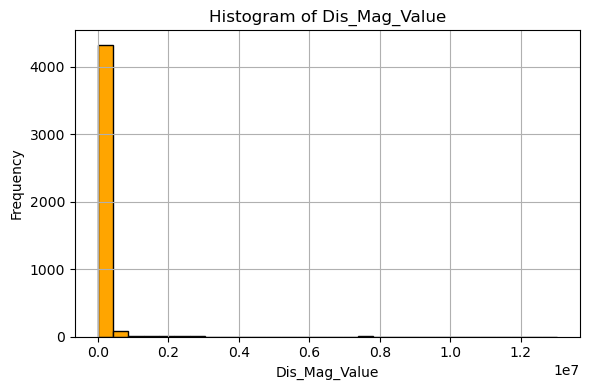

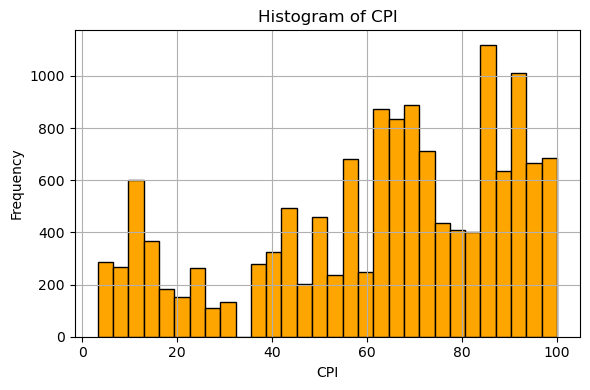

In [12]:
# (b) Histogram of Numeric Features
for col in numeric_features:
    plt.figure(figsize=(6,4))
    df[col].dropna().hist(bins=30, color='orange', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

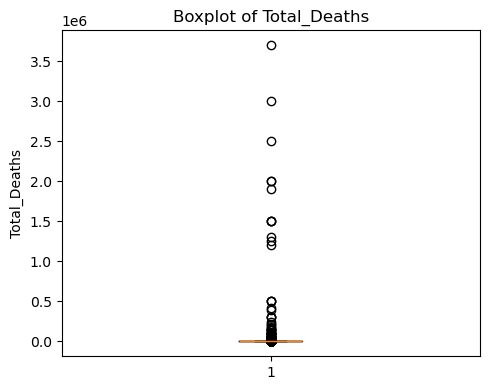

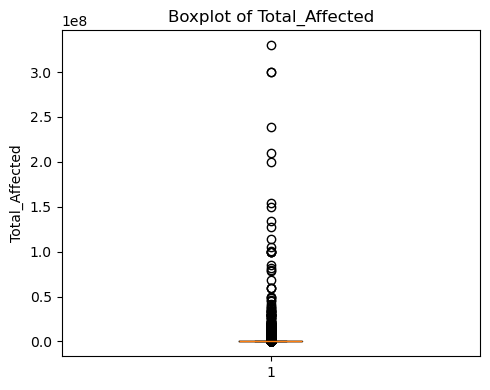

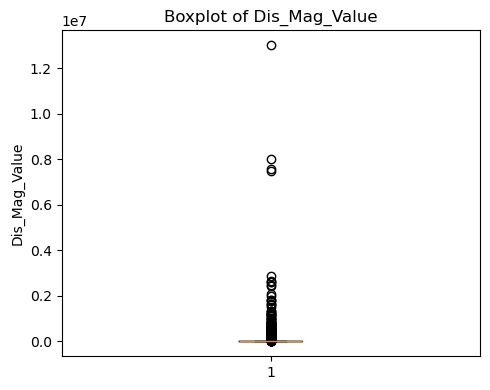

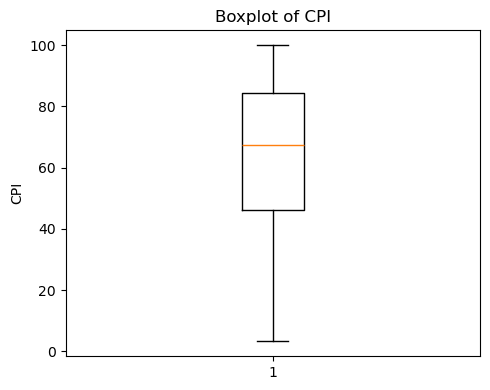

In [13]:
# (c) Boxplot of Numeric Features
for col in numeric_features:
    plt.figure(figsize=(5,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

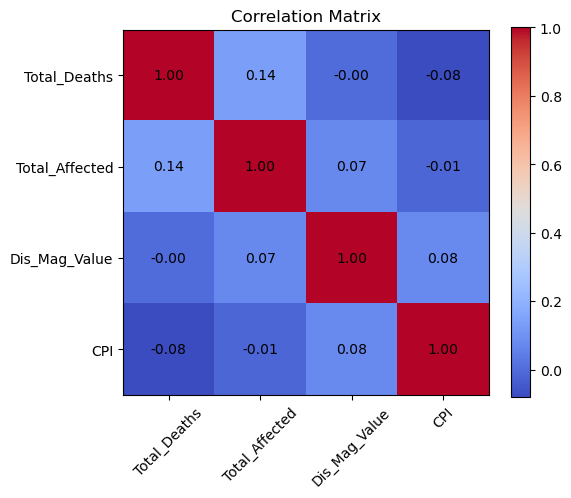

In [14]:
# (d) Correlation Heatmap
corr = df[numeric_features].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(ticks=np.arange(len(numeric_features)), labels=numeric_features, rotation=45)
plt.yticks(ticks=np.arange(len(numeric_features)), labels=numeric_features)
plt.title("Correlation Matrix")
for i in range(len(numeric_features)):
    for j in range(len(numeric_features)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

In [15]:
from sklearn import __version__ as skl_version

# Handle compatibility for OneHotEncoder
try:
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
except TypeError:
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [16]:
X = df[numeric_features + categorical_features]
le_target = LabelEncoder()
y = le_target.fit_transform(df[target])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)



Train shape: (11549, 6) Test shape: (2888, 6)



RandomForest Accuracy: 0.7116
              precision    recall  f1-score   support

     Drought       0.67      0.54      0.60       152
  Earthquake       0.99      0.96      0.98       307
    Epidemic       0.71      0.58      0.64       299
       Flood       0.68      0.76      0.72      1089
   Landslide       0.42      0.29      0.35       154
       Storm       0.71      0.71      0.71       887

    accuracy                           0.71      2888
   macro avg       0.70      0.64      0.66      2888
weighted avg       0.71      0.71      0.71      2888



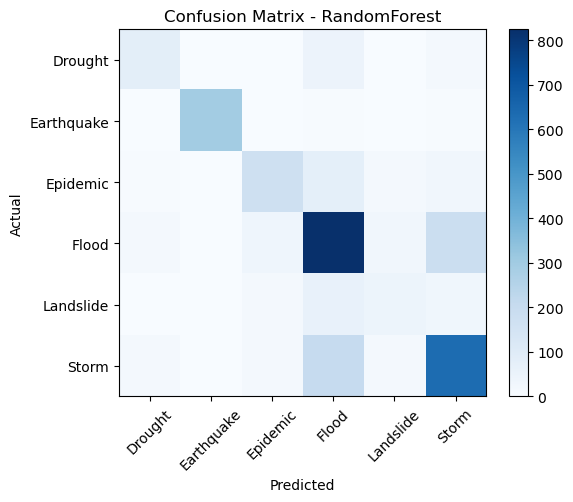

C:\Users\indhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



LogisticRegression Accuracy: 0.4283
              precision    recall  f1-score   support

     Drought       0.21      0.47      0.29       152
  Earthquake       0.36      0.49      0.42       307
    Epidemic       0.36      0.53      0.43       299
       Flood       0.76      0.22      0.34      1089
   Landslide       0.14      0.51      0.22       154
       Storm       0.66      0.60      0.63       887

    accuracy                           0.43      2888
   macro avg       0.42      0.47      0.39      2888
weighted avg       0.58      0.43      0.44      2888



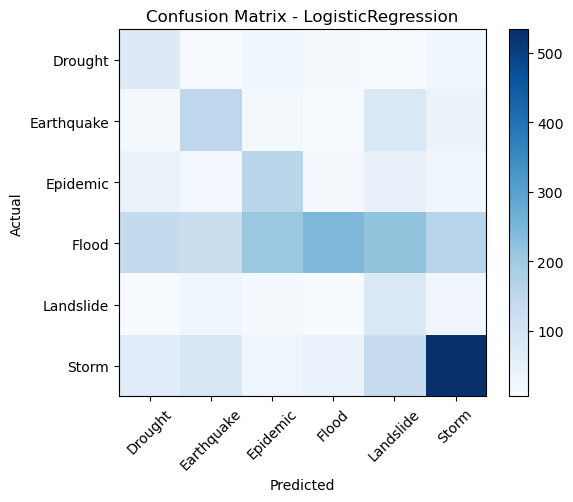


✅ Best Model: RandomForest (Accuracy: 0.71)


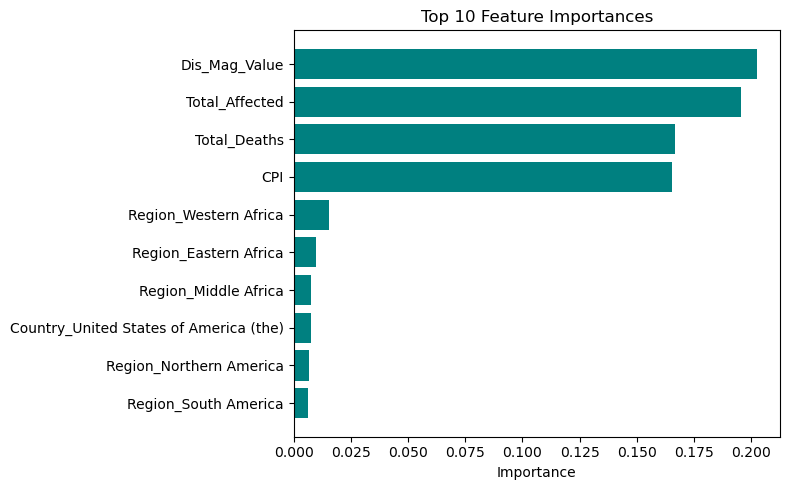

In [17]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "LogisticRegression": LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial', class_weight='balanced')
}

results = {}
trained_pipelines = {}

for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    plt.xticks(np.arange(len(le_target.classes_)), le_target.classes_, rotation=45)
    plt.yticks(np.arange(len(le_target.classes_)), le_target.classes_)
    plt.tight_layout()
    plt.show()
    results[name] = acc
    trained_pipelines[name] = clf

best_model_name = max(results, key=results.get)
best_pipeline = trained_pipelines[best_model_name]
print(f"\n✅ Best Model: {best_model_name} (Accuracy: {results[best_model_name]:.2f})")

# ------------------------------------
# 7. Feature Importance (if RandomForest)
# ------------------------------------
if best_model_name == "RandomForest":
    rf = best_pipeline.named_steps['model']
    cat_features = best_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
    feature_names = numeric_features + list(cat_features)
    importances = rf.feature_importances_
    feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(8,5))
    plt.barh(feat_imp['Feature'][:10][::-1], feat_imp['Importance'][:10][::-1], color='teal')
    plt.title("Top 10 Feature Importances")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

In [19]:
import numpy as np
import pandas as pd

def predict_from_user_input(pipeline, label_encoder):
    print("\nEnter details for prediction:")

    # Helper function to safely convert input to float
    def safe_float(x):
        try:
            return float(x) if x.strip() != "" else np.nan
        except:
            return np.nan

    # Collect user inputs
    total_deaths = safe_float(input("Total_Deaths: "))
    total_affected = safe_float(input("Total_Affected: "))
    dis_mag_value = safe_float(input("Dis_Mag_Value: "))
    cpi = safe_float(input("CPI: "))
    country = input("Country: ").strip() or "Unknown"
    region = input("Region: ").strip() or "Unknown"

    # Create DataFrame from user input
    user_df = pd.DataFrame([{
        'Total_Deaths': total_deaths,
        'Total_Affected': total_affected,
        'Dis_Mag_Value': dis_mag_value,
        'CPI': cpi,
        'Country': country,
        'Region': region
    }])

    # Predict using the provided pipeline
    try:
        pred = pipeline.predict(user_df)
        pred_label = label_encoder.inverse_transform(pred)[0]
        print("\n🌪️ Predicted Disaster Type:", pred_label)
    except Exception as e:
        print("\n❌ Error during prediction:", e)

# Instruction to the user
print("\nRun `predict_from_user_input(best_pipeline, le_target)` to test user prediction")



Run `predict_from_user_input(best_pipeline, le_target)` to test user prediction


In [20]:
predict_from_user_input(best_pipeline, le_target)



Enter details for prediction:


Total_Deaths:  45
Total_Affected:  100
Dis_Mag_Value:  123
CPI:  34
Country:  india
Region:  tamilnadu



🌪️ Predicted Disaster Type: Storm


In [26]:
import numpy as np
import pandas as pd

def predict_total_affected(pipeline, feature_cols):
    print("\n🌪️ Disaster Impact Prediction 🌪️\nEnter details for prediction:")

    # Helper function to safely convert input to float
    def safe_float(x):
        try:
            return float(x) if x.strip() != "" else np.nan
        except:
            return np.nan

    # Collect user inputs
    total_deaths = safe_float(input("How many people died? Total_Deaths: "))
    dis_mag_value = safe_float(input("Disaster magnitude (Dis_Mag_Value): "))
    cpi = safe_float(input("CPI: "))
    country = input("Country: ").strip() or "Unknown"
    region = input("Region: ").strip() or "Unknown"

    # Create DataFrame using only feature columns
    user_df = pd.DataFrame([{
        'Total_Deaths': total_deaths,
        'Dis_Mag_Value': dis_mag_value,
        'CPI': cpi,
        'Country': country,
        'Region': region
    }])

    # Keep only the columns expected by the pipeline
    user_df = user_df[feature_cols]

    # Predict
    try:
        predicted_affected = pipeline.predict(user_df)[0]
        print(f"\n🌟 Estimated number of people affected by this disaster: {int(predicted_affected)}")
    except Exception as e:
        print("\n❌ Error during prediction:", e)


In [28]:
feature_cols = best_pipeline.feature_names_in_
print(feature_cols)


['Total_Deaths' 'Total_Affected' 'Dis_Mag_Value' 'CPI' 'Country' 'Region']


In [29]:
predict_total_affected(best_pipeline, feature_cols)



🌪️ Disaster Impact Prediction 🌪️
Enter details for prediction:


How many people died? Total_Deaths:  100
Disaster magnitude (Dis_Mag_Value):  7.5
CPI:  4.1
Country:  India
Region:  Kerala


KeyError: "['Total_Affected'] not in index"

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Example: suppose df is your dataset
feature_cols = ['Total_Deaths', 'Dis_Mag_Value', 'CPI', 'Country', 'Region']
target_col = 'Total_Affected'

X = df[feature_cols]   # Features only
y = df[target_col]     # Target

# Preprocessing for numeric and categorical features
numeric_features = ['Total_Deaths', 'Dis_Mag_Value', 'CPI']
numeric_transformer = StandardScaler()

categorical_features = ['Country', 'Region']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Train pipeline
pipeline.fit(X, y)


ValueError: Input y contains NaN.